In [1]:
import sys
import pandas as pd
sys.path.insert(0, "../")

from src.clustering.select_partition import BestPartition
from src.clustering.clusters_visualized import ViewGroups

#### Select best partition

In [2]:
df_performance = pd.read_csv("../results/clustering/performances.csv")

best = BestPartition(df_performance=df_performance)
filtered_df, best_partition  = BestPartition.select_best_partition(df_performance)
filtered_df

,description,siluetas,calinski,davies,entropy,score
0,k_means_k_4,0.433918,16389.611747,0.734357,1.328768,16387.982540
1,minibatch_k_means_k_4,0.435935,16613.641729,0.738919,1.253994,16612.084751
2,Agglomerative_k_4,0.404508,15049.804036,0.763800,1.302110,15048.142633
3,Birch_k_4,0.402236,14141.685123,0.716252,1.224558,14140.146549
6,MeanShift,0.540254,11952.602889,0.599379,0.459085,11952.084679


In [3]:
print(f"Best partition is {best_partition['description']} with score: {best_partition['score']}")

Best partition is minibatch_k_means_k_4 with score: 16612.084750753696


#### View groups

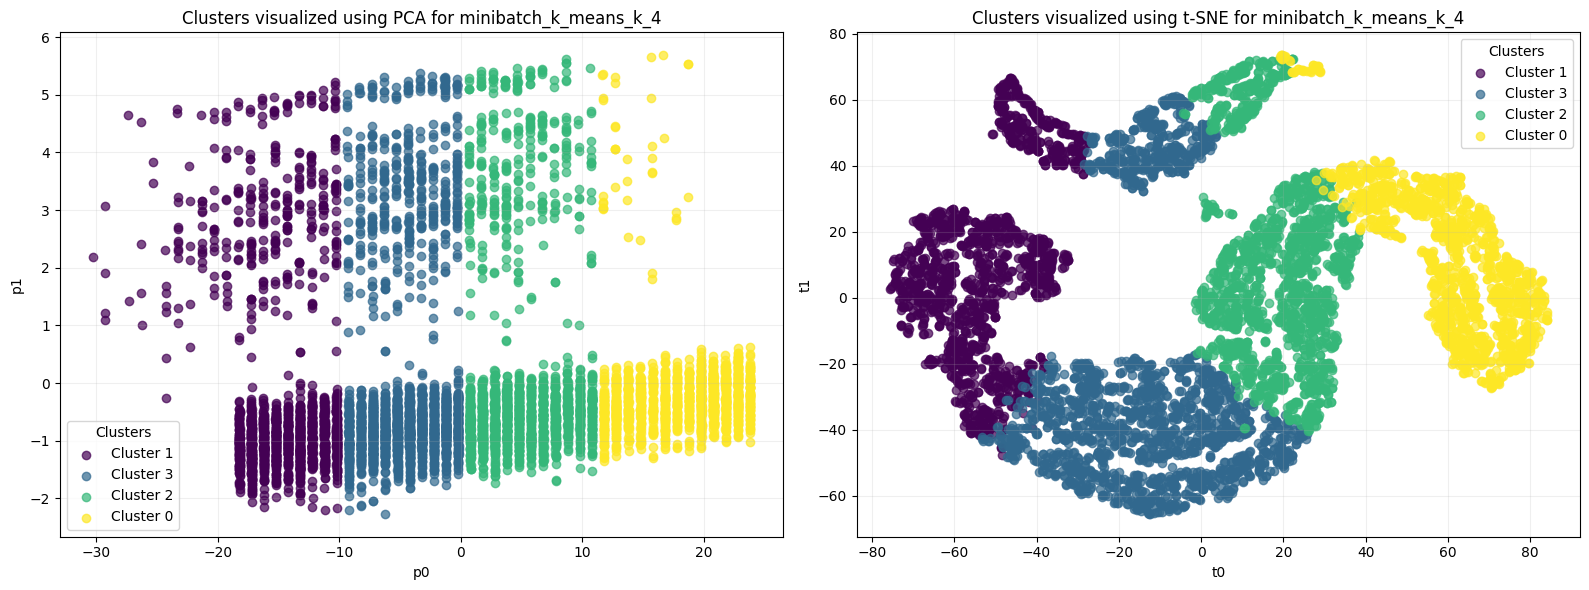

In [4]:
df_values = pd.read_csv("../results/preprocessing/05_dataset_scaled_robust.csv")
df_labels = pd.read_csv("../results/clustering/labels.csv")

visualized = ViewGroups(df_labels=df_labels, df_values=df_values)
visualized.visualize_best_partition(cluster_column="minibatch_k_means_k_4", 
                                    save_path="../results/clustering/best_partition_pca.png")

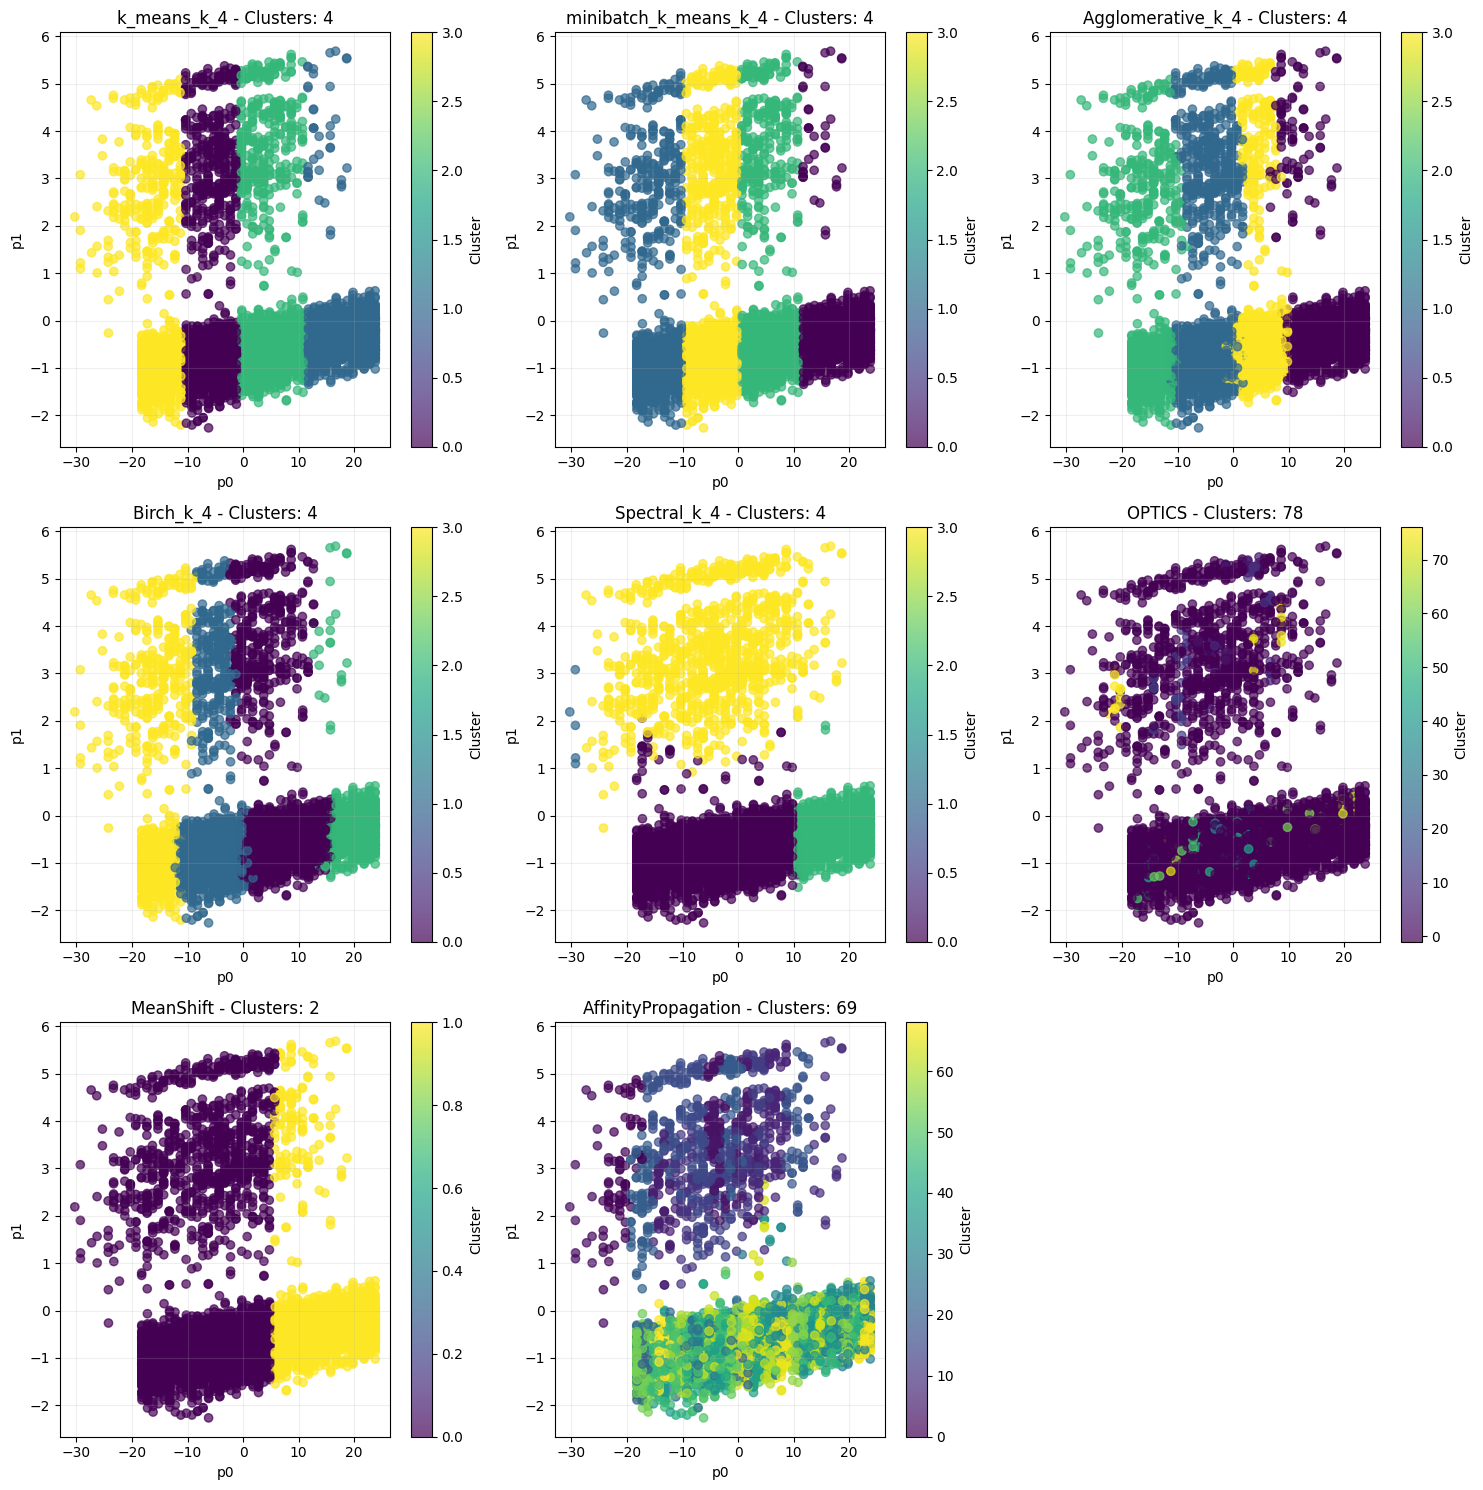

In [5]:
algorithms = [
    "k_means_k_4",
    "minibatch_k_means_k_4",
    "Agglomerative_k_4",
    "Birch_k_4",
    "Spectral_k_4",
    "OPTICS",
    "MeanShift",
    "AffinityPropagation"
]
visualized.visualize_clusters_pca(algorithms=algorithms, save_path="../results/clustering/clusters_pca.png")

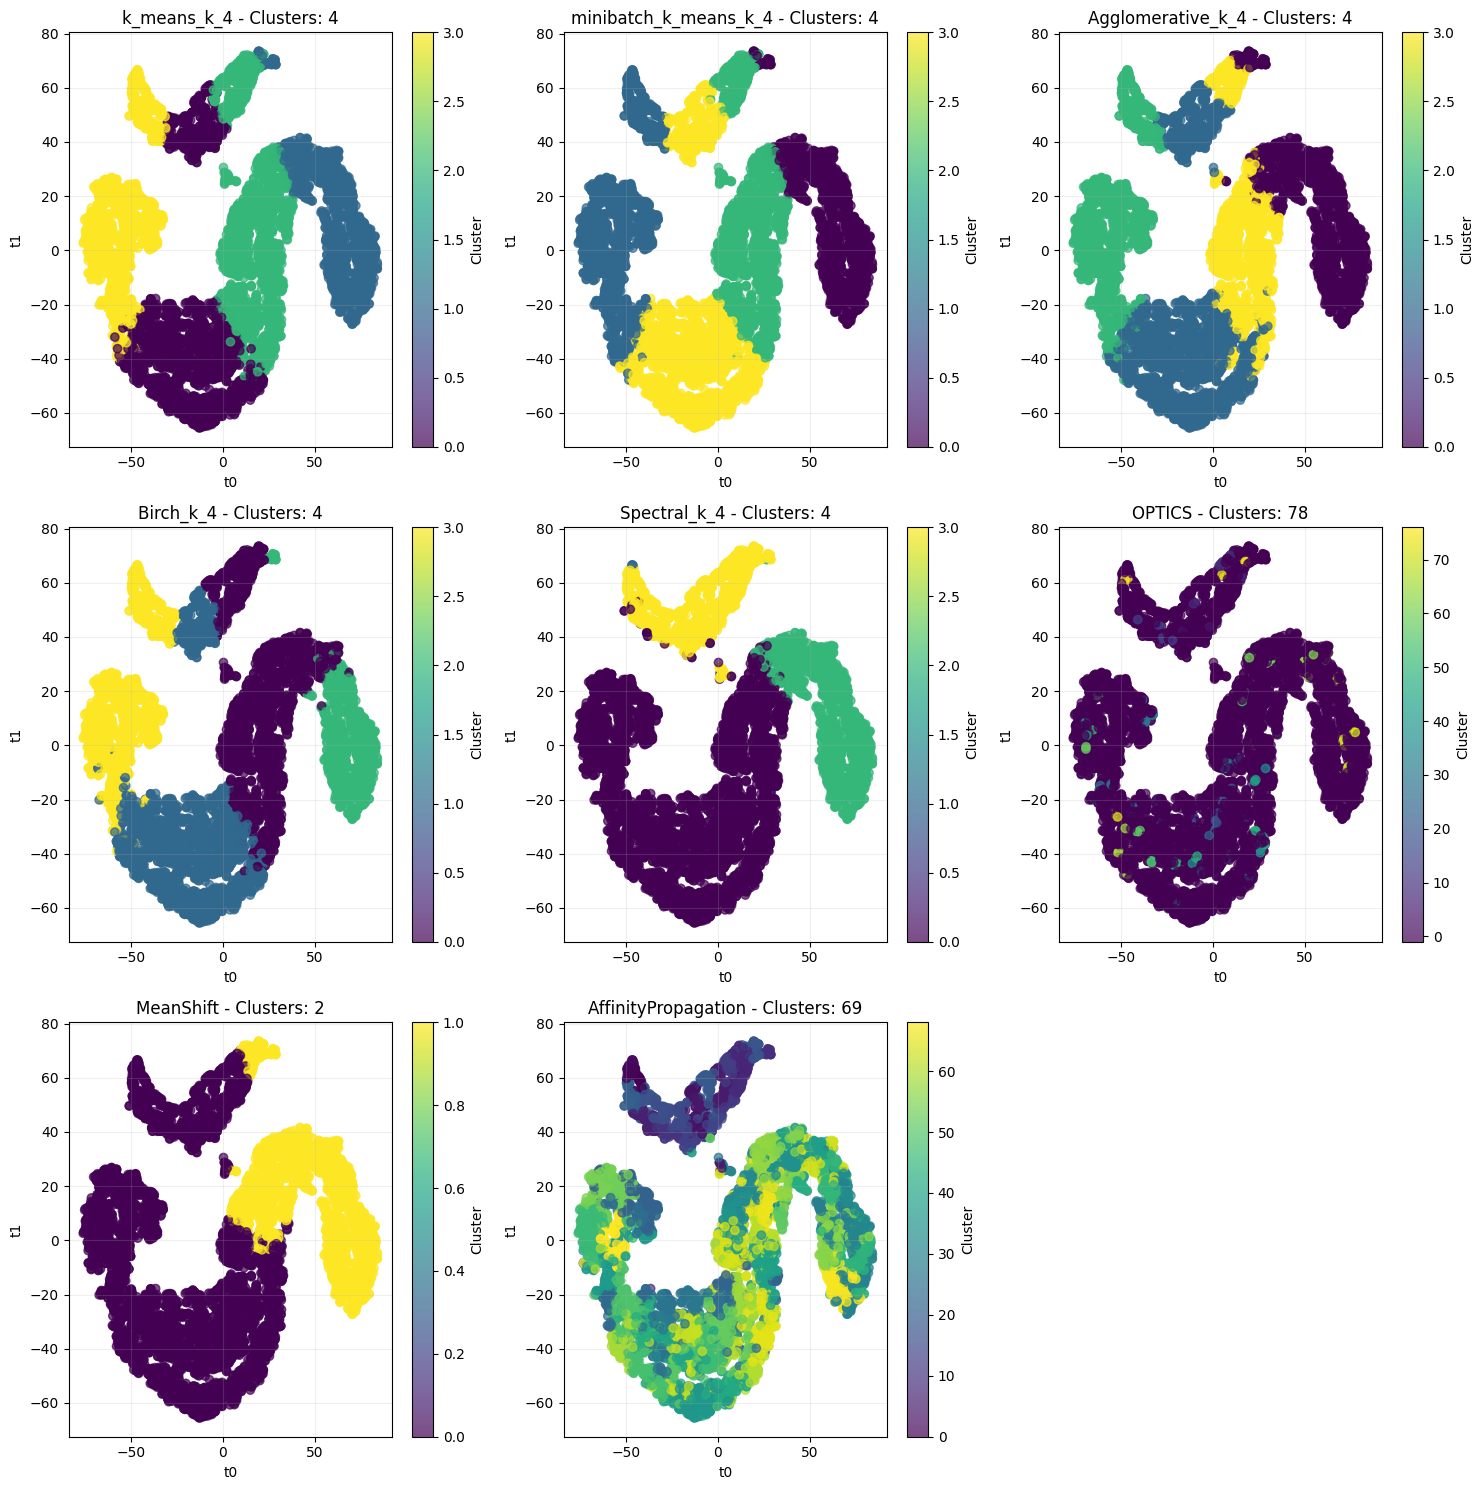

In [6]:
visualized.visualize_clusters_tsne(algorithms=algorithms, save_path="../results/clustering/clusters_tsne.png")